# [Teleco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## Objective
- The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers. The target is to predict customers who are likely to retain.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Dictionary
- customerID: unique ID for each customer
- gender: gender of the customer
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No Internet Service)
- DeviceProtection — Whether the customer has device protection or not (Yes, No, No Internet Service)
- TechSupport — Whether the customer has tech support or not (Yes, No, No Internet Service)
- StreamingTV—Whether the customer has a streaming TV (Yes, No, No Internet Service)
- StreamingMovies — Whether the customer has a streaming movie (Yes, No, No Internet Service)
- Contract — The type of contract the customer has (Month-to-Month, One year, Two years)
- PaperlessBilling — Whether the customer has a paperless billing (Yes, No)
- PaymentMethod — payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges — Amount charged to the customer monthly
- TotalCharges — The total amount charged to the customer
- Churn — Whether the customer churned or not (Yes or No) **The Target Column**

### Preprocessing and EDA

In [4]:
df = data.copy()

In [5]:
df.isnull().sum().sum()

0

- There are no null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Right off the bat, we'll probably drop the id column.
- Most of the features are categorial. 
- **SeniorCitizen** is a numerical feature but it's encoded actually, so it's a categorical feature as well.
- We got **tenure** and **MonthlyCharges** as the only numerical fetures,  even though **TotalCharges** should also be numerical, so we need to look into this feature.

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
non_numeric_values = pd.to_numeric(df['TotalCharges'], errors='coerce') #This will convert all non-numeric values to NaN
non_numeric_records = df[non_numeric_values.isna() & ~df['TotalCharges'].isna()]
non_numeric_records

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- These are probably white space characters.
- Now, it's safe to convert the column to numeric then maybe we could impute these values with the mean.

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

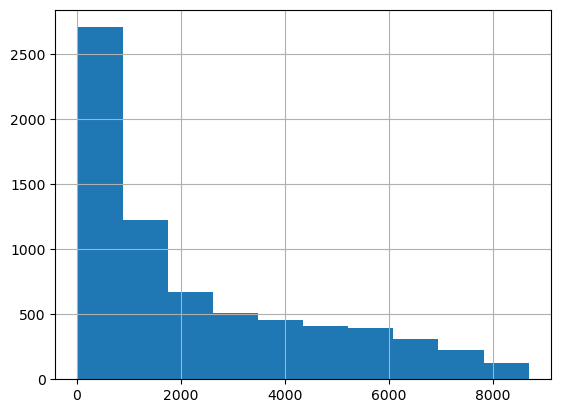

In [11]:
df['TotalCharges'].hist()

In [12]:
df['TotalCharges'].min()

18.8

In [13]:
df['TotalCharges'].max()

8684.8

<Axes: xlabel='TotalCharges'>

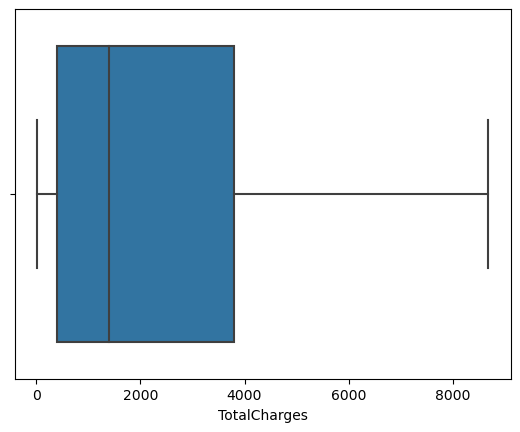

In [14]:
sns.boxplot(x=df['TotalCharges'])

- Imputing with the mean is probably not the best approach, the median or even the minimum value would be better, or maybe we could drop these records altogether.

In [15]:
median_total = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.isnull().sum().sum()

0

In [17]:
#Dropping the customer is column
df.drop('customerID', axis=1, inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


###### Analyzing the categorical features and assessing the association with the target

In [18]:
#checking the value counts of the categorical features
for column in df.select_dtypes(include=['object']).columns:
    print(f'The value counts of {df[column].value_counts()}','\n')

The value counts of gender
Male      3555
Female    3488
Name: count, dtype: int64 

The value counts of Partner
No     3641
Yes    3402
Name: count, dtype: int64 

The value counts of Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

The value counts of PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

The value counts of MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

The value counts of InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

The value counts of OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 

The value counts of OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 

The value counts of DeviceProtection
No                     3095
Yes                    2422
No internet service  

- Probably graphs with the target features would give us better insights.
- The target column is unbalanced, we'll need to handle that.

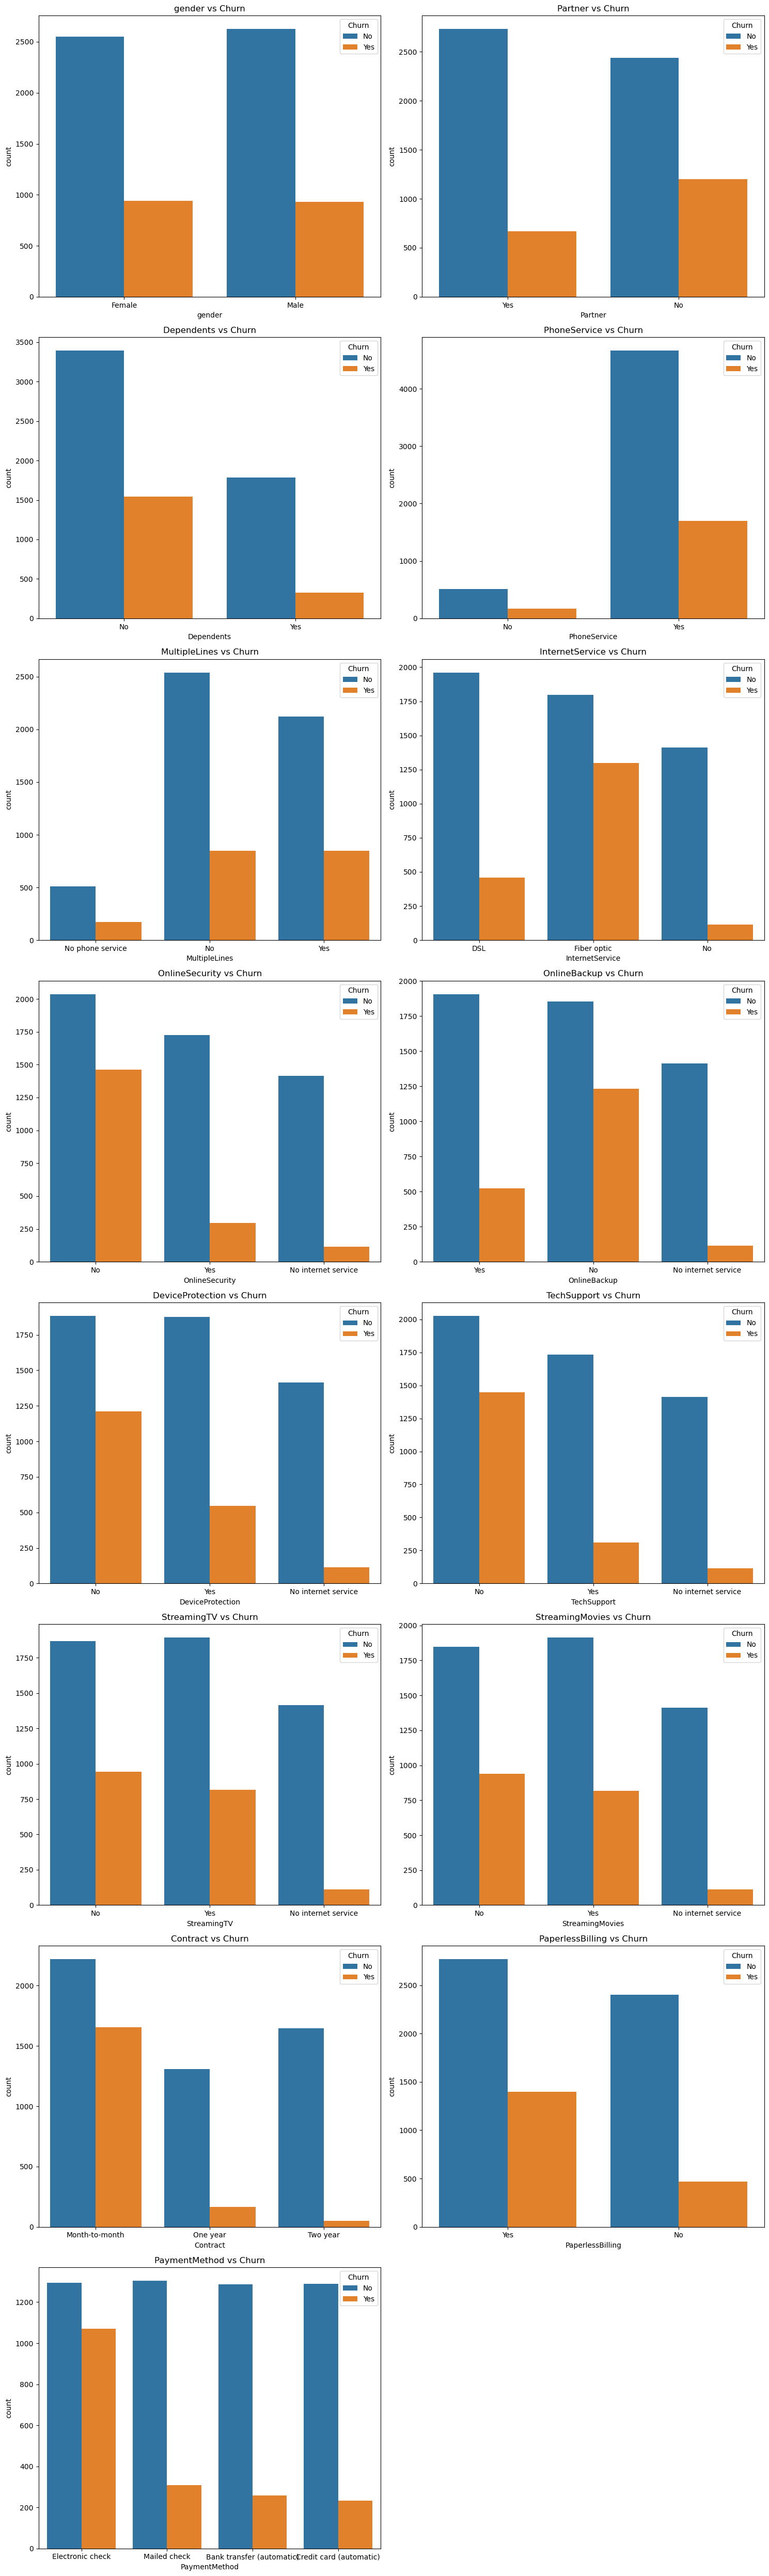

In [19]:
fig, axes = plt.subplots(8, 2, figsize=(15, 50))
fig.subplots_adjust(hspace=0.2)

for ax, column in zip(axes.flatten(), df.select_dtypes(include=['object']).columns[:-1]):
    sns.countplot(data=df, x=column, hue='Churn', ax=ax)
    ax.set_title(f'{column} vs Churn')

fig.delaxes(axes.flatten()[-1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- Most features are imbalanced, so we can't really draw a firm conclusion yet, however there are some insights:
    - people with no **partner** have slightly higher churn rate
    - people who use fiber optics as their **internetService** have higher churn rate. Hoewever, we actually have more records for people using fiber optics.
    -  people who don't have **onlineSecurity** or **onlineBackup** have higher churn rate. Same with **TechSupport** and **DeviceProtection**.
    - people who have month-to-month **Contract** have higer churn rate. Also the same with people who use Electronic Check as their **PaymentMethod**

In [20]:
from scipy.stats import chi2_contingency

# Chi-square test to assess the relationship with the target feature
for column in df.select_dtypes(include=['object']).columns:
    crosstab = pd.crosstab(df[column], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f'Chi-square test for {column}:')
    print(f'chi2={chi2}, p-value={p}\n')


Chi-square test for gender:
chi2=0.4840828822091383, p-value=0.48657873605618596

Chi-square test for Partner:
chi2=158.7333820309922, p-value=2.1399113440759935e-36

Chi-square test for Dependents:
chi2=189.12924940423474, p-value=4.9249216612154196e-43

Chi-square test for PhoneService:
chi2=0.9150329892546948, p-value=0.3387825358066928

Chi-square test for MultipleLines:
chi2=11.33044148319756, p-value=0.0034643829548773

Chi-square test for InternetService:
chi2=732.309589667794, p-value=9.571788222840544e-160

Chi-square test for OnlineSecurity:
chi2=849.9989679615965, p-value=2.661149635176552e-185

Chi-square test for OnlineBackup:
chi2=601.812790113409, p-value=2.0797592160864276e-131

Chi-square test for DeviceProtection:
chi2=558.419369407389, p-value=5.505219496457244e-122

Chi-square test for TechSupport:
chi2=828.1970684587394, p-value=1.4430840279998987e-180

Chi-square test for StreamingTV:
chi2=374.2039433109813, p-value=5.528994485739183e-82

Chi-square test for Strea

- Most features have very small p-value, indicating a strong relationship with the target column.
- **gender** and **PhoneService** don't seem to have much association with the target, we could drop them if we want.

In [21]:
df.select_dtypes(include='number').head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50


###### Analyzing the numerical features and assessing the relationship with the target

In [22]:
# creating numric df without 'SeniorCitizen' and including the target
num_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
num_df

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes
...,...,...,...,...
7038,24,84.80,1990.50,No
7039,72,103.20,7362.90,No
7040,11,29.60,346.45,No
7041,4,74.40,306.60,Yes


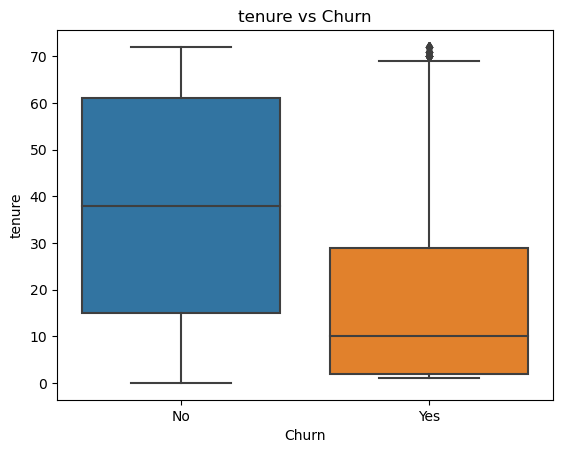

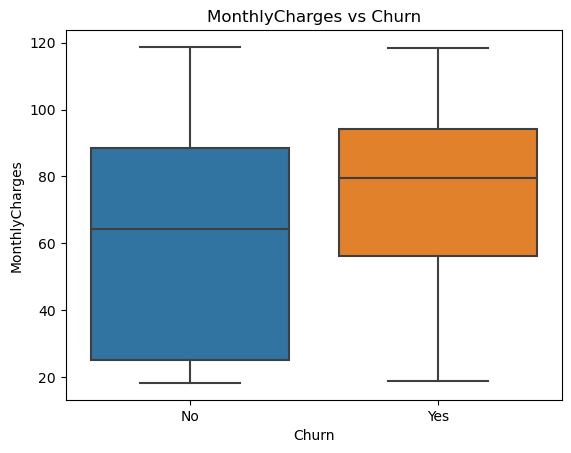

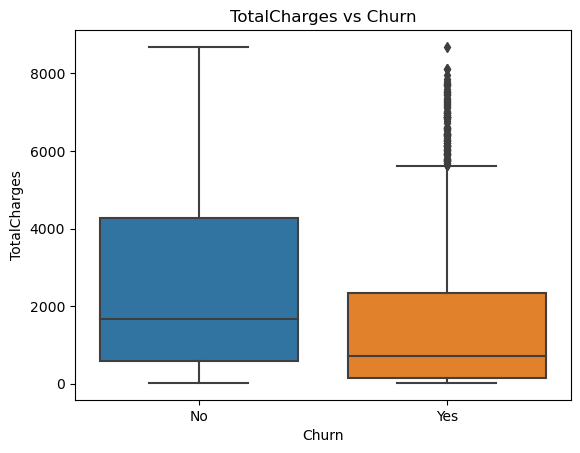

In [23]:
for column in num_df.select_dtypes(include=['number']).columns:
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'{column} vs Churn')
    plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

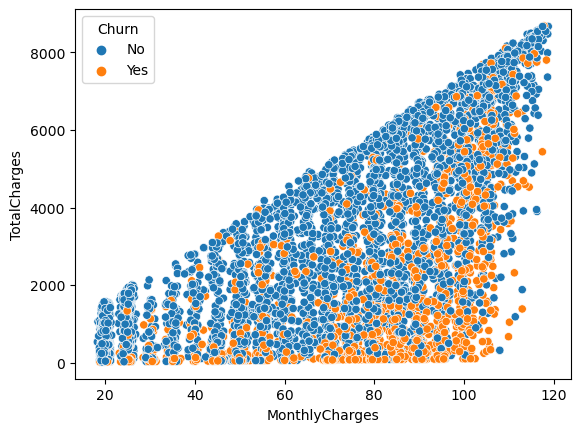

In [24]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=num_df)

- It seems that customers with higher **MonthlyCharges** seem to have a higher tendency to churn.
- The blue points are more or less uniformly distributed across the range of **MonthlyCharges** and **TotalCharges**, suggesting that non-churners are distributed across different levels of charges.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


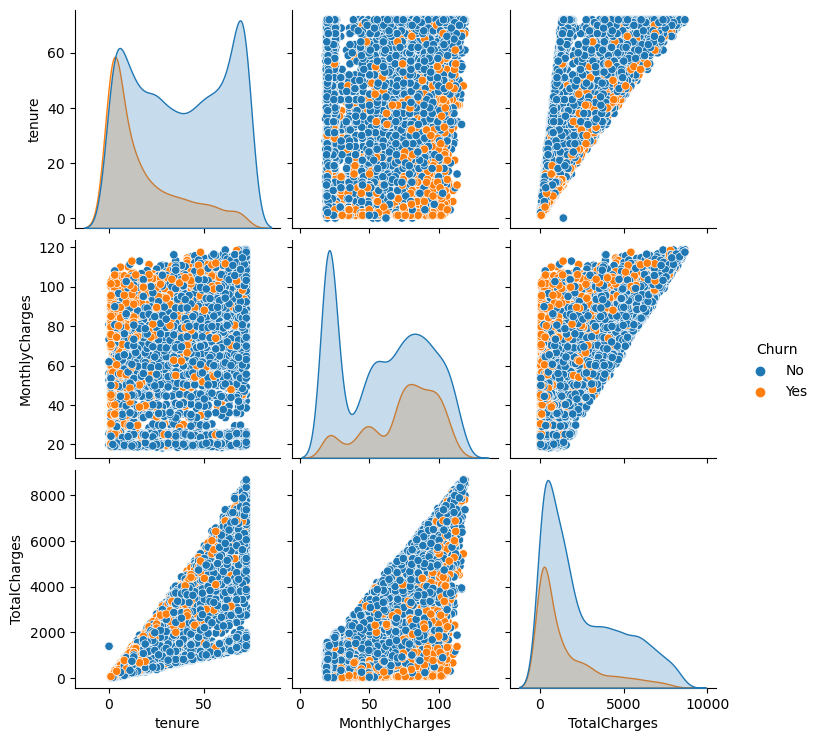

In [25]:
sns.pairplot(num_df, hue='Churn', diag_kind='kde')
plt.show()

- **Tenure**: higher proportion of churners at the lower range.
- **MonthlyCharges**: spread-out distribution with higher proportion of churners at the higher range and a peak of non-churners at the lower range.
- **TotalCharges**: A peak of churners at the lower range suggesting that higher total charges correlate with lower churn rates.
- We will probably scale these features.

###### Encoding and Scaling

In [26]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [27]:
for col in df.select_dtypes(include='object').columns:
    print(f'Uniques values in {col}',df[col].unique())

Uniques values in gender ['Female' 'Male']
Uniques values in Partner ['Yes' 'No']
Uniques values in Dependents ['No' 'Yes']
Uniques values in PhoneService ['No' 'Yes']
Uniques values in MultipleLines ['No phone service' 'No' 'Yes']
Uniques values in InternetService ['DSL' 'Fiber optic' 'No']
Uniques values in OnlineSecurity ['No' 'Yes' 'No internet service']
Uniques values in OnlineBackup ['Yes' 'No' 'No internet service']
Uniques values in DeviceProtection ['No' 'Yes' 'No internet service']
Uniques values in TechSupport ['No' 'Yes' 'No internet service']
Uniques values in StreamingTV ['No' 'Yes' 'No internet service']
Uniques values in StreamingMovies ['No' 'Yes' 'No internet service']
Uniques values in Contract ['Month-to-month' 'One year' 'Two year']
Uniques values in PaperlessBilling ['Yes' 'No']
Uniques values in PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Uniques values in Churn ['No' 'Yes']


- Binary Encoding for **gender**, **Partner**, **Dependents**, **PhoneService**, **PaperlessBilling** and **Churn**.
- One-hot Encoding for the rest. 
- We could approach this in different ways but the probablt the optimal one is using ColumnTransformer to combine later with the model.

In [28]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [29]:
df_cleaned = df.copy()

In [30]:
len(df['Churn'].unique())

2

In [31]:
from sklearn.preprocessing import LabelEncoder

def binary_encoder(df):
    for col in df.select_dtypes(include='object').columns:
        if len(df[col].unique())==2:
            df[col] = LabelEncoder().fit_transform(df[col])
    return df

In [32]:
df = binary_encoder(df)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0


In [33]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

- Splitting train\validation\test w.r.t the target column.
- We'll perform resambling technique on the training data to handle the imbalanced data.

In [35]:
X_train.shape

(4930, 19)

In [36]:
y_train.value_counts()

Churn
0    3622
1    1308
Name: count, dtype: int64

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

onehot_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), onehot_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)  


In [39]:
#Fitting and transforming the data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [40]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

- SMOTEENN: Balances the dataset by combining SMOTE for oversampling the minority class and ENN (Edited Nearest Neighbors) for cleaning the majority class. This method tries to mitigate the drawbacks of both oversampling and undersampling by creating synthetic examples and removing noisy examples.

In [41]:
X_train_res.shape

(4558, 30)

In [42]:
y_train_res.value_counts()

Churn
1    2628
0    1930
Name: count, dtype: int64

In [43]:
y_train.value_counts()

Churn
0    3622
1    1308
Name: count, dtype: int64

- Looks like it didn't add too many values to the minority class, and it cleaned over 1000 values in the majority class.

### Training
##### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


def get_acc_scores(y, y_pred):
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return acc, precision, recall, f1

def print_scores(acc, prec, rec, f1):
    print('Accuracy score: ', acc)
    print('Precision score: ', prec) 
    print('Recall score: ', recall)
    print('F1 score: ', f1)
    
def plot_roc_train_val(model, X_train, y_train, X_val, y_val):
    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:,1])
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_val, tpr_val, _ = roc_curve(y_val, model.predict_proba(X_val)[:,1])
    roc_auc_val = auc(fpr_val, tpr_val)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_val, tpr_val, label=f'Validation ROC (AUC = {roc_auc_val:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    

In [45]:
lr_model = LogisticRegression()

lr_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [46]:
y_train_pred_lr = lr_model.predict(X_train_res)

In [47]:
accuracy, precision, recall, f1 = get_acc_scores(y_train_res, y_train_pred_lr)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9186046511627907
Precision score:  0.9193608324043107
Recall score:  0.941400304414003
F1 score:  0.930250047001316


- F1 score = 93% .. could be better.

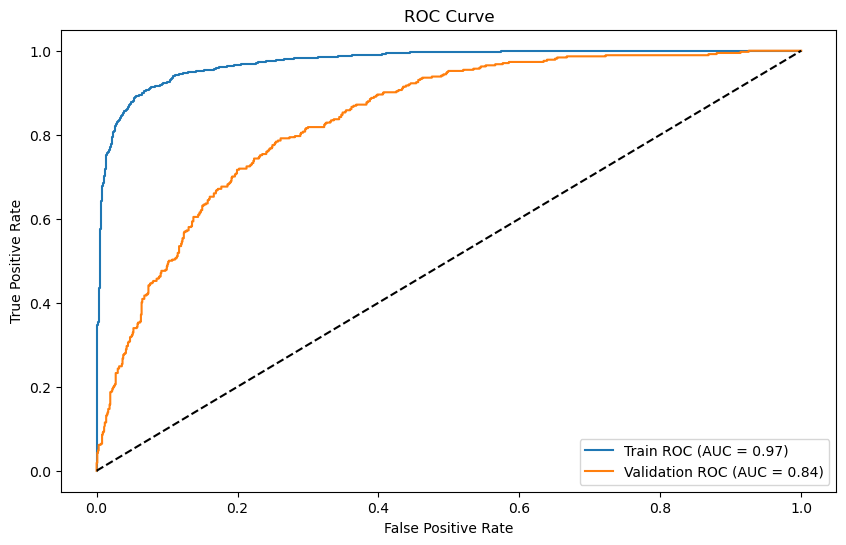

In [48]:
plot_roc_train_val(lr_model, X_train_res, y_train_res, X_val, y_val)

In [49]:
y_val_pred_lr = lr_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_lr)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.6917613636363636
Precision score:  0.45786516853932585
Recall score:  0.8716577540106952
F1 score:  0.6003683241252302


In [50]:
models_score = {'logistic_scores':[accuracy, precision, recall, f1]}
models_score

{'logistic_scores': [0.6917613636363636,
  0.45786516853932585,
  0.8716577540106952,
  0.6003683241252302]}

###### RandomForrestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()
rf_param = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

rf_grid = GridSearchCV(rf_model, param_grid=rf_param, scoring='f1', cv=5, verbose=3)
rf_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.894 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.901 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.905 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.885 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.904 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.896 total time=   0.1s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.898 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.897 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.887 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.880 total time=   0.0s
[CV 1/5]

[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.917 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.907 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.925 total time=   0.2s
[CV 2/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.944 total time=   0.2s
[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.916 total time=   0.2s
[CV 4/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.906 total time=   0.3s
[CV 5/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.914 total time=   0.2s
[CV 1/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, score=0.925 total time=   0.3s
[CV 2/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, score=0.939 total time=   0.4s
[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, 

[CV 1/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.932 total time=   0.3s
[CV 2/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.943 total time=   0.3s
[CV 3/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.918 total time=   0.3s
[CV 4/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.912 total time=   0.4s
[CV 5/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.918 total time=   0.3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1', verbose=3)

In [52]:
rf_grid.best_params_

{'max_depth': 6, 'max_leaf_nodes': 9, 'n_estimators': 50}

In [53]:
rf_best_model = rf_grid.best_estimator_

In [54]:
y_train_pred_rf = rf_best_model.predict(X_train_res)
accuracy, precision, recall, f1 = get_acc_scores(y_train_res, y_train_pred_rf)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9164107064501975
Precision score:  0.9171927218715188
Recall score:  0.9398782343987824
F1 score:  0.9283969178725804


In [55]:
y_pred_proba = rf_best_model.predict_proba(X_train_res)[:,1]
y_pred_proba

array([0.33813413, 0.05054673, 0.69845754, ..., 0.06788479, 0.91974038,
       0.7194646 ])

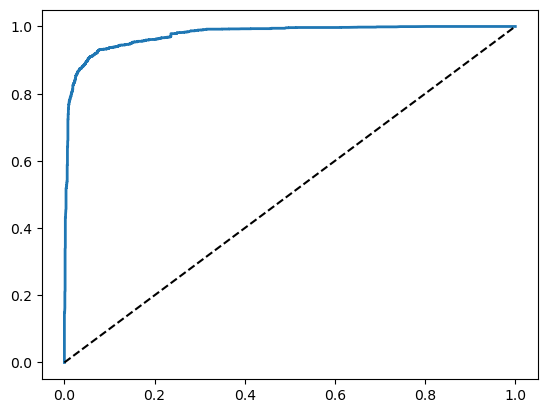

In [56]:
fpr, tpr, thresholds = roc_curve(y_train_res, y_pred_proba)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

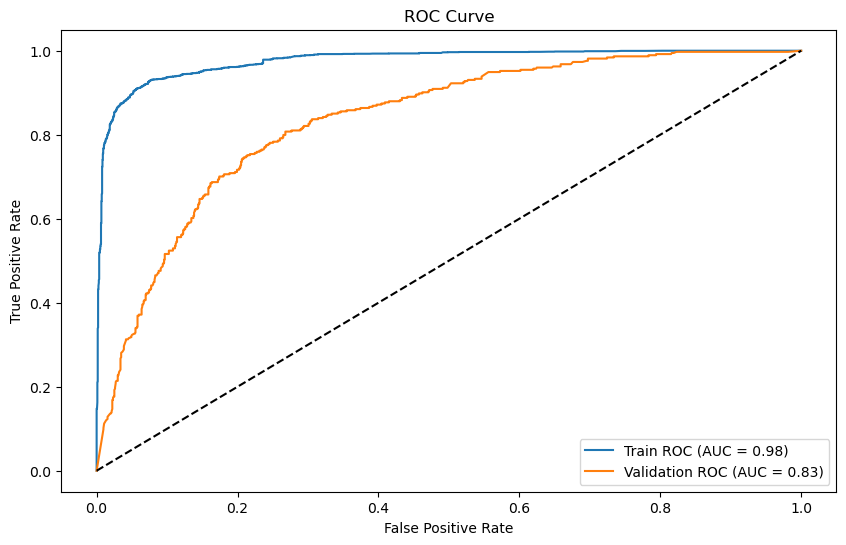

In [57]:
plot_roc_train_val(rf_best_model, X_train_res, y_train_res, X_val, y_val)

In [58]:
y_val_pred_rf = rf_best_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_rf)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.6882102272727273
Precision score:  0.4541607898448519
Recall score:  0.8609625668449198
F1 score:  0.5946445060018467


- Not so good, the model is performing poorly on the val data.

In [59]:
models_score['randomforest_scores'] = [accuracy, precision, recall, f1]
models_score

{'logistic_scores': [0.6917613636363636,
  0.45786516853932585,
  0.8716577540106952,
  0.6003683241252302],
 'randomforest_scores': [0.6882102272727273,
  0.4541607898448519,
  0.8609625668449198,
  0.5946445060018467]}

###### SVC

In [60]:
from sklearn.svm import SVC

svc_model = SVC(random_state=42 ,probability=True)
svc_param = {'C':[0.1, 1, 10, 10],
             'kernel':['linear', 'poly', 'rbf']}

svc_grid = GridSearchCV(svc_model, param_grid=svc_param, scoring='f1', cv=5, verbose=3)
svc_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.928 total time=   0.6s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.940 total time=   0.6s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.918 total time=   0.6s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.914 total time=   0.6s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.908 total time=   0.4s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.934 total time=   0.7s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.937 total time=   0.7s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.919 total time=   0.7s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.913 total time=   0.7s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.911 total time=   0.7s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.937 total time=   1.4s
[CV 2/5] END .................C=0.1, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='f1', verbose=3)

In [61]:
svc_grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [62]:
svc_best_model = svc_grid.best_estimator_

In [63]:
y_train_pred_svc = svc_best_model.predict(X_train_res)
accuracy, precision, recall, f1 = get_acc_scores(y_train_res, y_train_pred_svc)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9874945151382185
Precision score:  0.9856441254250095
Recall score:  0.9927701674277016
F1 score:  0.9891943127962085


- Overfitting Flag.

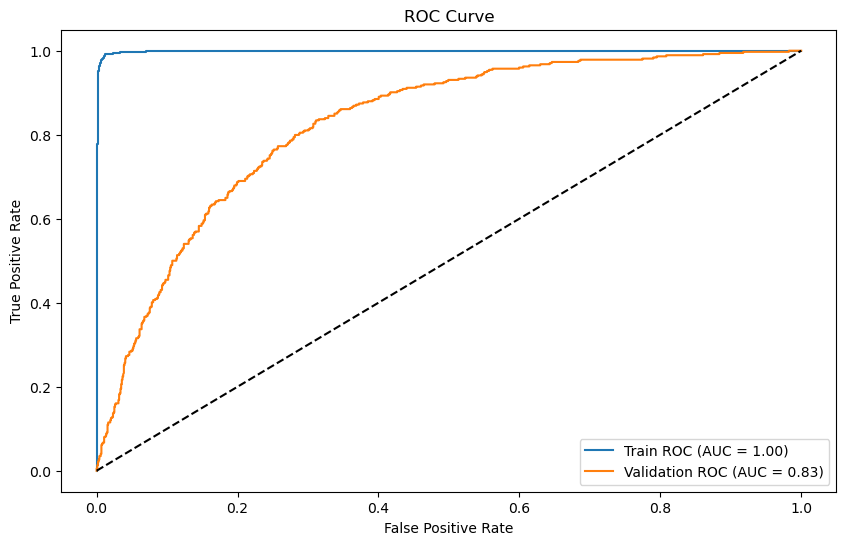

In [64]:
plot_roc_train_val(svc_best_model, X_train_res, y_train_res, X_val, y_val)

In [65]:
y_val_pred_svc = svc_best_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_svc)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7279829545454546
Precision score:  0.49270664505672607
Recall score:  0.8128342245989305
F1 score:  0.6135216952573158


In [66]:
models_score['svc_scores'] = [accuracy, precision, recall, f1]
models_score

{'logistic_scores': [0.6917613636363636,
  0.45786516853932585,
  0.8716577540106952,
  0.6003683241252302],
 'randomforest_scores': [0.6882102272727273,
  0.4541607898448519,
  0.8609625668449198,
  0.5946445060018467],
 'svc_scores': [0.7279829545454546,
  0.49270664505672607,
  0.8128342245989305,
  0.6135216952573158]}

###### GradientBoosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5]
}

gb_grid = GridSearchCV(gb_model, param_grid=gb_param, scoring='f1', cv=5, verbose=3)
gb_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.919 total time=   1.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.940 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.916 total time=   0.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.917 total time=   1.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.910 total time=   0.9s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.938 total time=   2.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.948 total time=   1.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.931 total time=   1.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.928 total time=   1.8s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.9

[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.961 total time=   4.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.979 total time=   3.7s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.969 total time=   3.9s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.964 total time=   3.7s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.917 total time=   0.9s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.957 total time=   0.8s
[CV 3/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.975 total time=   0.6s
[CV 4/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.964 total time=   0.7s
[CV 5/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.961 total time=   0.7s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=200;, score=0.916 total time=   1.7s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_est

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=3)

In [68]:
gb_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, max_depth=5, n_estimators=200,
                           random_state=42)

In [69]:
gb_grid.best_score_

0.9631464793889786

In [70]:
gb_best_model = gb_grid.best_estimator_

In [71]:
y_train_pred_gb = gb_best_model.predict(X_train_res)

accuracy, precision, recall, f1 = get_acc_scores(y_train_res, y_train_pred_gb)
print_scores(accuracy, precision, recall, f1)

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


- WOW! 🚩

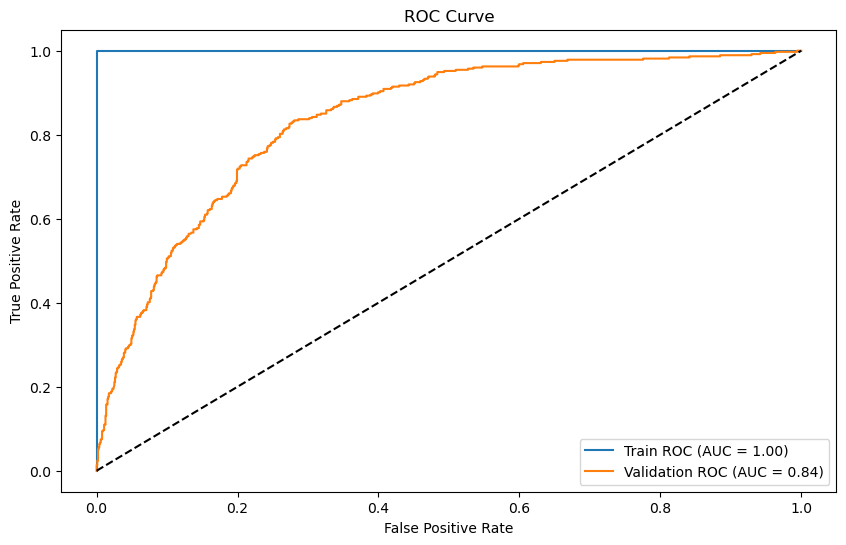

In [72]:
plot_roc_train_val(gb_best_model, X_train_res, y_train_res, X_val, y_val)

In [73]:
y_val_pred_gb = gb_best_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_gb)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7492897727272727
Precision score:  0.5174708818635607
Recall score:  0.8315508021390374
F1 score:  0.637948717948718


- Still, can't generalize well.

In [74]:
models_score['gradient_scores'] = [accuracy, precision, recall, f1]
models_score

{'logistic_scores': [0.6917613636363636,
  0.45786516853932585,
  0.8716577540106952,
  0.6003683241252302],
 'randomforest_scores': [0.6882102272727273,
  0.4541607898448519,
  0.8609625668449198,
  0.5946445060018467],
 'svc_scores': [0.7279829545454546,
  0.49270664505672607,
  0.8128342245989305,
  0.6135216952573158],
 'gradient_scores': [0.7492897727272727,
  0.5174708818635607,
  0.8315508021390374,
  0.637948717948718]}

###### AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)
ada_param = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_grid = GridSearchCV(ada_model, param_grid=ada_param, scoring='f1', cv=5, verbose=3)
ada_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.889 total time=   0.2s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.891 total time=   0.1s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.839 total time=   0.2s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.842 total time=   0.2s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.865 total time=   0.2s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.902 total time=   0.4s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.919 total time=   0.4s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.897 total time=   0.4s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.892 total time=   0.4s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.890 total time=   0.3s
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.911 total time=   0.9s
[CV 2/5] END learning_rate=0.01,

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=3)

In [76]:
ada_best_model = ada_grid.best_estimator_
y_train_pred_gb = ada_best_model.predict(X_train_res)

accuracy, precision, recall, f1 = get_acc_scores(y_train_res, y_train_pred_gb)
print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9545853444493199
Precision score:  0.9562759140595553
Recall score:  0.965372907153729
F1 score:  0.9608028782427571


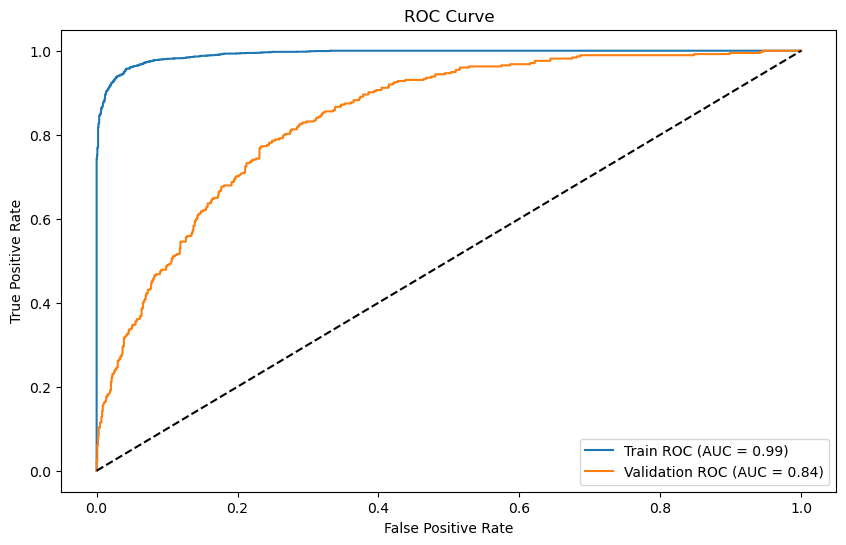

In [77]:
plot_roc_train_val(ada_best_model, X_train_res, y_train_res, X_val, y_val)

In [78]:
y_val_pred_ada = ada_best_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_ada)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7272727272727273
Precision score:  0.49216300940438873
Recall score:  0.839572192513369
F1 score:  0.6205533596837944


In [79]:
models_score['ada_scores'] = [accuracy, precision, recall, f1]
models_score

{'logistic_scores': [0.6917613636363636,
  0.45786516853932585,
  0.8716577540106952,
  0.6003683241252302],
 'randomforest_scores': [0.6882102272727273,
  0.4541607898448519,
  0.8609625668449198,
  0.5946445060018467],
 'svc_scores': [0.7279829545454546,
  0.49270664505672607,
  0.8128342245989305,
  0.6135216952573158],
 'gradient_scores': [0.7492897727272727,
  0.5174708818635607,
  0.8315508021390374,
  0.637948717948718],
 'ada_scores': [0.7272727272727273,
  0.49216300940438873,
  0.839572192513369,
  0.6205533596837944]}

- All the models have higher recall and low precision, which is not unusual for an imbalanced data. The model tends to capture most positive instances to avoid missing any. However, the model may also incorrectly classify many negative instances as positive (false positives).

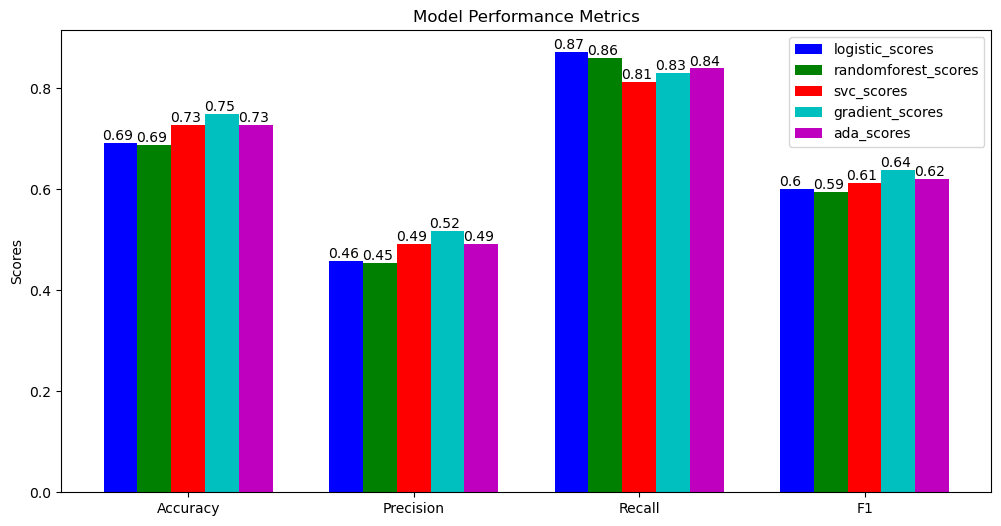

In [80]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
models = list(models_score.keys())
values = np.array(list(models_score.values()))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Number of metrics
n_metrics = len(metrics)
index = np.arange(n_metrics)

# Bar width
bar_width = 0.15

# Colors for each model
colors = ['b', 'g', 'r', 'c', 'm']

# Plotting bars
for i, (model, color) in enumerate(zip(models, colors)):
    bars = plt.bar(index + i * bar_width, values[i], bar_width, label=model, color=color)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0-.08, yval, round(yval, 2), va='bottom')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

- Still, almost all the models can't generalize well.
- **GradientBoosting** yields the highest F1 score.
- Maybe we can try another resampling technique.

In [81]:
#split for only train/valid sets to give the model more data to learn from
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.fit_transform(X_val)

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [84]:
X_train_resampled.shape

(8278, 30)

In [85]:
X_train.shape

(5634, 30)

In [86]:
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [87]:
y_train_resampled.value_counts()

Churn
0    4139
1    4139
Name: count, dtype: int64

In [88]:
#Training GradientBoosting again on the new resampled data
gb_model = GradientBoostingClassifier()
gb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5]
}

gb_grid = GridSearchCV(gb_model, param_grid=gb_param, scoring='f1', cv=5, verbose=3)
gb_grid.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.782 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.790 total time=   1.5s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.812 total time=   1.3s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.803 total time=   1.5s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.790 total time=   1.5s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.777 total time=   3.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.789 total time=   3.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.828 total time=   3.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.818 total time=   3.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.7

[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.721 total time=   7.7s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.925 total time=   7.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.910 total time=   7.6s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.901 total time=   7.4s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.674 total time=   1.5s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.728 total time=   1.5s
[CV 3/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.912 total time=   1.4s
[CV 4/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.909 total time=   1.5s
[CV 5/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.898 total time=   1.4s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=200;, score=0.646 total time=   3.4s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_est

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=3)

In [89]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [90]:
gb_best_model = gb_grid.best_estimator_

In [91]:
y_train_pred_gb = gb_best_model.predict(X_train_resampled)

accuracy, precision, recall, f1 = get_acc_scores(y_train_resampled, y_train_pred_gb)
print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.8895868567286784
Precision score:  0.8832897551699548
Recall score:  0.897801401304663
F1 score:  0.8904864605799185


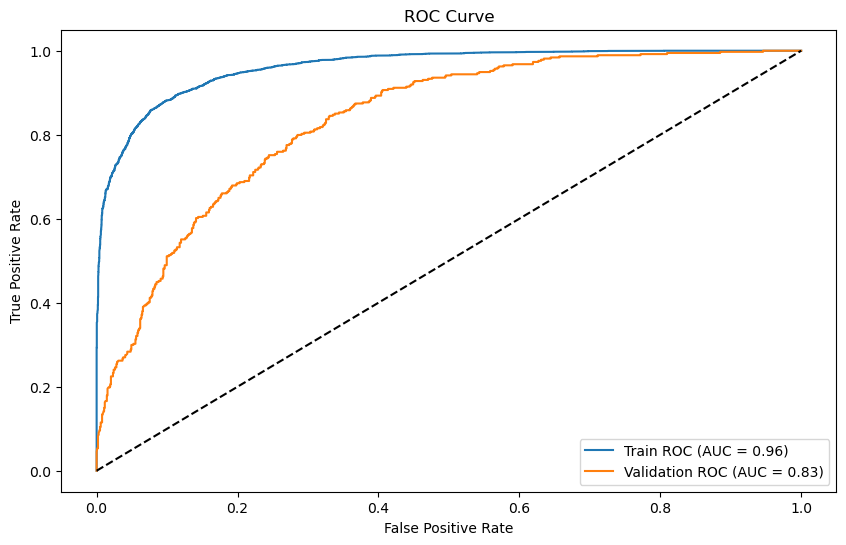

In [92]:
plot_roc_train_val(gb_best_model, X_train_resampled, y_train_resampled, X_val, y_val)

In [93]:
y_val_pred_gb = gb_best_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_gb)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7601135557132718
Precision score:  0.5362903225806451
Recall score:  0.7112299465240641
F1 score:  0.6114942528735631


In [94]:
models_score['gradient_scores']

[0.7492897727272727, 0.5174708818635607, 0.8315508021390374, 0.637948717948718]

- The model performed better on the resampled data using **SMOTEENN**

In [95]:
#logistic regression on the new resampled datta
lr_model = LogisticRegression()

lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [96]:
y_train_pred_lr = lr_model.predict(X_train_resampled)
accuracy, precision, recall, f1 = get_acc_scores(y_train_resampled, y_train_pred_lr)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.773737617782073
Precision score:  0.7527889335118251
Recall score:  0.8151727470403479
F1 score:  0.7827398213664308


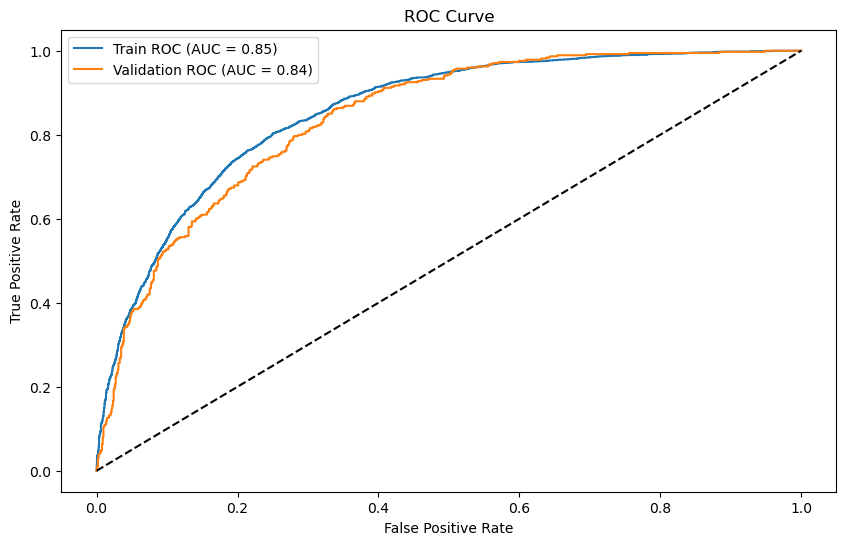

In [97]:
plot_roc_train_val(lr_model, X_train_resampled, y_train_resampled, X_val, y_val)

In [98]:
y_val_pred_lr = lr_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_lr)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7395315826827538
Precision score:  0.5059625212947189
Recall score:  0.7941176470588235
F1 score:  0.6181061394380852


In [99]:
models_score['logistic_scores']

[0.6917613636363636,
 0.45786516853932585,
 0.8716577540106952,
 0.6003683241252302]

- The performance on the training data is much worse than before.
- Maybe we can look at the features again and see if we can work on them.

In [100]:
df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
for col in df_cleaned.select_dtypes(include='object').columns:
    print(f'Uniques values in {col}',df_cleaned[col].unique())

Uniques values in gender ['Female' 'Male']
Uniques values in Partner ['Yes' 'No']
Uniques values in Dependents ['No' 'Yes']
Uniques values in PhoneService ['No' 'Yes']
Uniques values in MultipleLines ['No phone service' 'No' 'Yes']
Uniques values in InternetService ['DSL' 'Fiber optic' 'No']
Uniques values in OnlineSecurity ['No' 'Yes' 'No internet service']
Uniques values in OnlineBackup ['Yes' 'No' 'No internet service']
Uniques values in DeviceProtection ['No' 'Yes' 'No internet service']
Uniques values in TechSupport ['No' 'Yes' 'No internet service']
Uniques values in StreamingTV ['No' 'Yes' 'No internet service']
Uniques values in StreamingMovies ['No' 'Yes' 'No internet service']
Uniques values in Contract ['Month-to-month' 'One year' 'Two year']
Uniques values in PaperlessBilling ['Yes' 'No']
Uniques values in PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Uniques values in Churn ['No' 'Yes']


- Maybe we can replace "No phone service" and "No internet service" with "No" and then, simply binary-encode these features as well.

In [102]:
df2 = df_cleaned.copy()

In [103]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [104]:
df2['MultipleLines'] = df2['MultipleLines'].replace({'No phone service':'No'})
df2['OnlineSecurity'] = df2['OnlineSecurity'].replace({'No internet service':'No'})
df2['OnlineBackup'] = df2['OnlineBackup'].replace({'No internet service':'No'})
df2['DeviceProtection'] = df2['DeviceProtection'].replace({'No internet service':'No'})
df2['TechSupport'] = df2['TechSupport'].replace({'No internet service':'No'})
df2['StreamingTV'] = df2['StreamingTV'].replace({'No internet service':'No'})
df2['StreamingMovies'] = df2['StreamingMovies'].replace({'No internet service':'No'})

In [105]:
for col in df2.select_dtypes(include='object').columns:
    print(f'Uniques values in {col}',df2[col].unique())

Uniques values in gender ['Female' 'Male']
Uniques values in Partner ['Yes' 'No']
Uniques values in Dependents ['No' 'Yes']
Uniques values in PhoneService ['No' 'Yes']
Uniques values in MultipleLines ['No' 'Yes']
Uniques values in InternetService ['DSL' 'Fiber optic' 'No']
Uniques values in OnlineSecurity ['No' 'Yes']
Uniques values in OnlineBackup ['Yes' 'No']
Uniques values in DeviceProtection ['No' 'Yes']
Uniques values in TechSupport ['No' 'Yes']
Uniques values in StreamingTV ['No' 'Yes']
Uniques values in StreamingMovies ['No' 'Yes']
Uniques values in Contract ['Month-to-month' 'One year' 'Two year']
Uniques values in PaperlessBilling ['Yes' 'No']
Uniques values in PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Uniques values in Churn ['No' 'Yes']


In [106]:
df2 = binary_encoder(df2)
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


- We could also engineer some features, maybe between the **tenure** and how much they pay, however it's  probably not going to help much.

In [107]:
df2.select_dtypes('object').columns

Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')

In [108]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']

In [109]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Split only for train/val sets.

In [110]:
onehot_features = ['InternetService', 'Contract', 'PaymentMethod']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

preprocessor2 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), onehot_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

In [111]:
X_train = preprocessor2.fit_transform(X_train)
X_val = preprocessor2.fit_transform(X_val)

In [112]:
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

In [113]:
#Training GradientBoosting again on the new resampled data
gb_model = GradientBoostingClassifier(random_state=42)
gb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5]
}

gb_grid = GridSearchCV(gb_model, param_grid=gb_param, scoring='f1', cv=5, verbose=3)
gb_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.927 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.907 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.916 total time=   0.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.909 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.918 total time=   1.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.935 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.924 total time=   2.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.929 total time=   1.8s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.924 total time=   2.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.9

[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.960 total time=   5.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.981 total time=   4.8s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.969 total time=   5.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.968 total time=   4.7s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.914 total time=   0.9s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.953 total time=   0.9s
[CV 3/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.971 total time=   0.8s
[CV 4/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.955 total time=   0.8s
[CV 5/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.967 total time=   1.0s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=200;, score=0.910 total time=   2.4s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_est

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=3)

In [120]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [121]:
gb_best_model = gb_grid.best_estimator_
y_train_pred_gb = gb_best_model.predict(X_train_res)

In [122]:
accuracy, precision, recall, f1 = get_acc_scores(y_train_res, y_train_pred_gb)
print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9863065804488399
Precision score:  0.9870818151705862
Recall score:  0.9890474610023232
F1 score:  0.9880636604774535


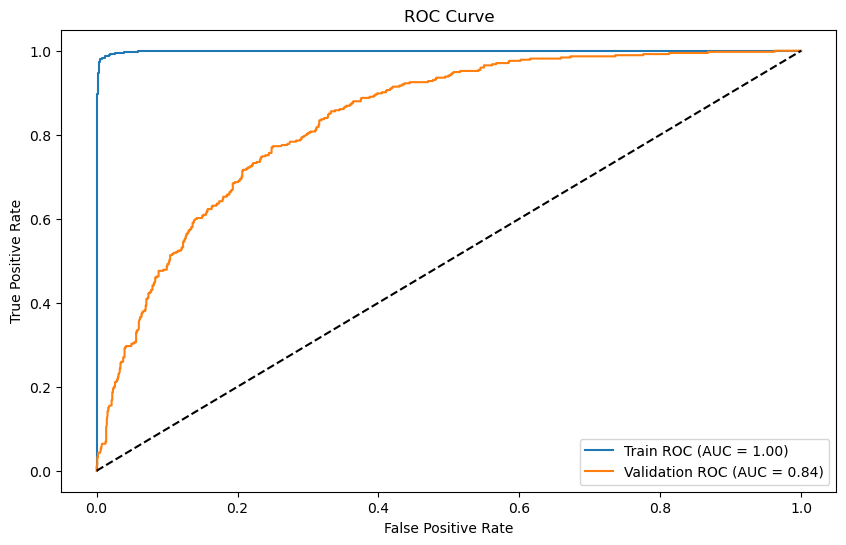

In [123]:
plot_roc_train_val(gb_best_model, X_train_res, y_train_res, X_val, y_val)

In [124]:
y_val_pred_gb = gb_best_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_gb)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7288857345635202
Precision score:  0.49337748344370863
Recall score:  0.7967914438502673
F1 score:  0.6094069529652352


In [125]:
models_score['gradient_scores']

[0.7492897727272727, 0.5174708818635607, 0.8315508021390374, 0.637948717948718]

- Well, changing the encoding strategy didn't help.

##### Conclusion
- So far, the best model is **GradientBoosting**, yielding the highest F1-score, however the imbalance issue is causing all the models to catch a lot of false positives.
- Tried different resampling techniques, turns out that oversampling the minority class with **SMOTE** doesn't necessarily boost the performance. In face, using **SMOTEENN** is more efficient.
- Tried different encoding strategies, first method results higher overall performance.

In [128]:
onehot_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

final_preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), onehot_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
) 

In [133]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [134]:
X_train = final_preprocessor.fit_transform(X_train)
X_val = final_preprocessor.transform(X_val)

In [135]:
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

In [136]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5]
}

final_grid = GridSearchCV(gb_model, param_grid=gb_param, scoring='f1', cv=5, verbose=3)
final_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.927 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.907 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.916 total time=   0.8s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.909 total time=   1.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.918 total time=   0.9s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.935 total time=   2.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.924 total time=   2.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.929 total time=   1.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.924 total time=   2.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.9

[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.960 total time=   4.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.981 total time=   4.6s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.969 total time=   4.8s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.969 total time=   4.6s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.916 total time=   0.9s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.953 total time=   0.9s
[CV 3/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.971 total time=   1.0s
[CV 4/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.955 total time=   0.8s
[CV 5/5] END learning_rate=0.3, max_depth=3, n_estimators=100;, score=0.967 total time=   0.8s
[CV 1/5] END learning_rate=0.3, max_depth=3, n_estimators=200;, score=0.917 total time=   1.8s
[CV 2/5] END learning_rate=0.3, max_depth=3, n_est

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=3)

In [137]:
gb_best_model = final_grid.best_estimator_

In [138]:
y_train_pred_gb = gb_best_model.predict(X_train_res)
accuracy, precision, recall, f1 = get_acc_scores(y_train_res, y_train_pred_gb)
print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9863065804488399
Precision score:  0.9870818151705862
Recall score:  0.9890474610023232
F1 score:  0.9880636604774535


In [139]:
y_val_pred_gb = gb_best_model.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_gb)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7352732434350603
Precision score:  0.5008375209380235
Recall score:  0.7994652406417112
F1 score:  0.615859938208033


In [140]:
import pickle
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(final_preprocessor, f)

In [142]:
with open('churn_classifier.pkl', 'wb') as f:
    pickle.dump(gb_best_model, f)